# Effects of loan variables on APR, Loan Status, and Loan original amount.
## by Shikhar Sharma

## Investigation Overview

> My main objective was to analyze loan data and find the variables which affected the APR, loan status and loan original amount.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.
> This data set contains 96201 loans with 18 variables for each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I also did some data wrangling, data encoding and data transformation by removing duplicates, missing values, inconsistent data, applying transforming on limits,bins and converting discrete data types to categorical data types.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/Users/MICROSOFT/Downloads/prosperLoanData.csv')

In [3]:
loan_df = df[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome','MonthlyLoanPayment','IncomeVerifiable']]

In [4]:
loan_df = loan_df.drop_duplicates()
loan_df = loan_df.dropna()

In [5]:
outliers_dti = (loan_df['DebtToIncomeRatio']>1)
#Removing outlier from our data.
loan_df = loan_df.loc[-outliers_dti,:]

In [6]:
outlier_data = (loan_df['CreditScoreRangeLower']<300) | (loan_df['CreditScoreRangeUpper']<300)
loan_df=loan_df.loc[-outlier_data,:]
#loan_df = loan_df.reset_index()

In [7]:
def base_color(c=0):
    l = sns.color_palette()[c]
    return l

def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

def log_trans(z,inverse=False):
    if not inverse:
        return np.log10(z)
    else:
        return z**3

In [8]:
cs = np.array(loan_df['CreditScoreRangeLower'])
d = {'Exceptional':np.arange(800,881,1),'Very Good':np.arange(740,800,1),'Good':np.arange(670,740,1),'Fair':np.arange(580,670,1),'Poor':np.arange(300,580,1)}
l=[]
ns=[]
for i in range(cs.shape[0]):
    for key,val in d.items():
        if cs[i] in val:
            l.append(key)

In [9]:
loan_df=loan_df.assign(credit_score_class=l)

In [10]:
# Category names for each numerical value.
list_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
 7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}
# Running a loop over dataset and dictionary created.
#Adding dictionary values based on keys which are equal to the values present in our listing category.
u=[]
for i in range(loan_df.shape[0]):
    for j in range(len(list_cat)):
        if loan_df['ListingCategory (numeric)'].values[i] == list(list_cat.keys())[j]:
            u.append(list(list_cat.values())[j])

In [11]:
loan_df['ListingLabels'] = u

In [12]:
loan_df=loan_df.drop('ListingCategory (numeric)',axis=1)

In [13]:
loan_df.head()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable,credit_score_class,ListingLabels
0,E33A3400205839220442E84,36,Completed,0.16516,0.1580,CO,Other,Self-employed,9425,640.0,659.0,0.17,258,3083.333333,330.43,True,Fair,Not Available
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,CO,Professional,Employed,10000,680.0,699.0,0.18,1,6125.000000,318.93,True,Good,Home Improvement
2,6954337960046817851BCB2,36,Completed,0.28269,0.2750,GA,Other,Not available,3001,480.0,499.0,0.06,41,2083.333333,123.32,True,Poor,Not Available
3,A0393664465886295619C51,36,Current,0.12528,0.0974,GA,Skilled Labor,Employed,10000,800.0,819.0,0.15,158,2875.000000,321.45,True,Exceptional,Motorcycle
4,A180369302188889200689E,36,Current,0.24614,0.2085,MN,Executive,Employed,15000,680.0,699.0,0.26,20,9583.333333,563.97,True,Good,Home Improvement


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of 'Borrower APR' 

> The distribution of loan borrower APR takes on a unimodal shape. It ranges from 0.065 the lowest APR to 0.43 the highest APR. Maximum count of borrower APR is 0.36 approx. (Highest peak in the plot).

In [14]:
credit_class=['Poor','Fair','Good','Very Good','Exceptional']
t=pd.api.types.CategoricalDtype(categories=credit_class,ordered=True)
loan_df['credit_score_class']=loan_df['credit_score_class'].astype(t)

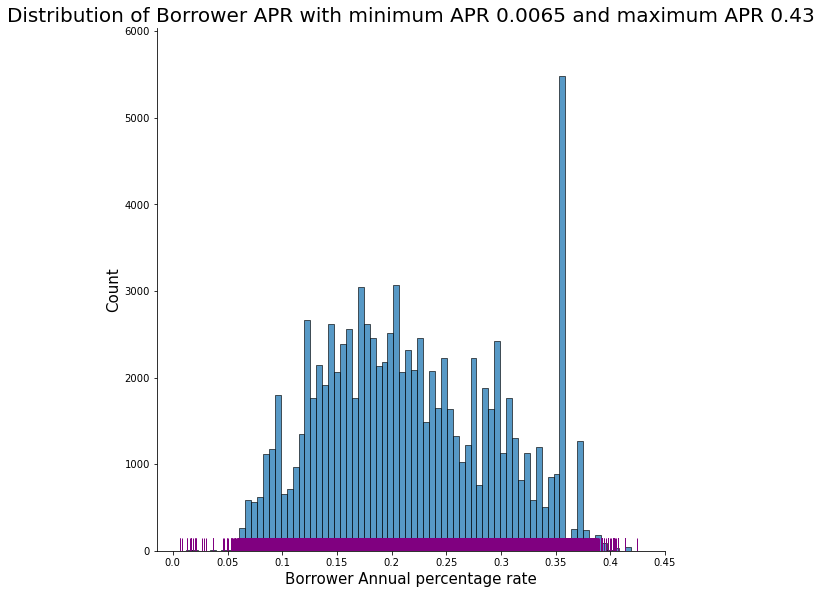

In [15]:
ticks = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
labels = ['{}'.format(v)for v in ticks]
#plt.figure(figsize=[ 11.69, 8.27])
sns.displot(data=loan_df,x='BorrowerAPR',rug=True,rug_kws={'c':'purple'},height=8)
plt.title('Distribution of Borrower APR with minimum APR 0.0065 and maximum APR 0.43',fontdict={'size':20})
plt.xticks(ticks,labels)
plt.xlabel('Borrower Annual percentage rate',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.show()
#sns.displot(data=loan_df,x='BorrowerAPR',kind='kde',rug=True,rug_kws={'c':'red'})
#plt.xlabel('Borrower APR',fontdict={'size':15})
#plt.ylabel('Density',fontdict={'size':15});

## Distribution of 'Term' 

> Maximum borrowers have taken loan (72343) for 36 months term based on the data. Also, number of times loan taken for 60 months is 22555, and for 12 months, count is 1409 which is the lowest.

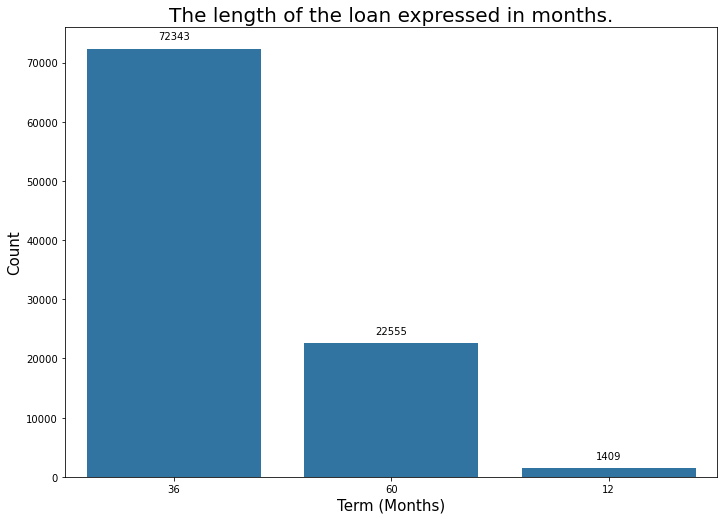

In [16]:
plt.figure(figsize=(11.69, 8.27))
base_color = sns.color_palette()[0]
sns.countplot(x='Term',data=loan_df,color=base_color,order=loan_df['Term'].value_counts().index)
plt.xlabel('Term (Months)')
for i in range (loan_df['Term'].value_counts().shape[0]):
    count = loan_df['Term'].value_counts().values[i]
    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.title('The length of the loan expressed in months.',fontdict={'size':20})
plt.xlabel('Term (Months)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15});

## Distribution of 'Borrower Rate'

> The distribution is bimodal with minimum borrower rate of 0 and maximum borrower rate of 0.36. Moreover, at first from 0.05 approx. their is a gradual increase in frequencies until the next peak is reached. This continues until one of the highest peak is reached which is at 0.14. After than their is a gradual decrease in frequencies until the next peak is reached. The second highest peak is at 0.32 approx.



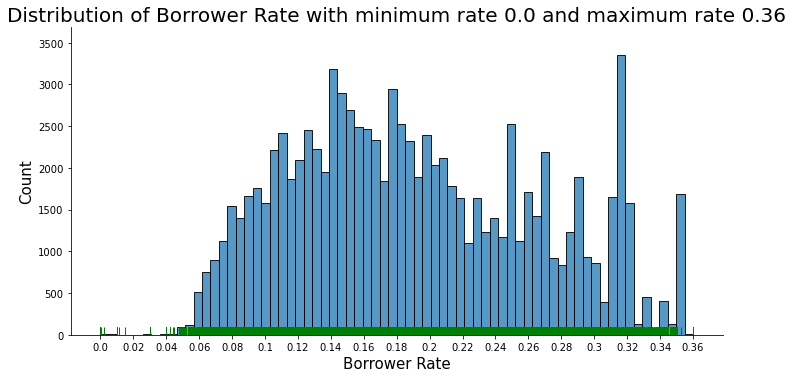

In [17]:
ticks = np.arange(0.0,0.36+0.02,0.02)
labels = ['{}'.format(v)for v in ticks]
sns.displot(data=loan_df,x='BorrowerRate',rug=True,rug_kws={'c':'green'},aspect=2)
plt.title('Distribution of Borrower Rate with minimum rate 0.0 and maximum rate 0.36',fontdict={'size':20})
plt.xticks(ticks,labels)
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15});

## Distribution of 'Debt To Income Ratio'

> In debt to income ratio, the distribution is right skewed and unimodal. Also, I did some transformation by increasing the bins in order to reduce the noise and make the plot more readable. We have maximum count of DTI between 0.15 and 0.20. Their is a gradual increase in the frequencies until the highest peak is reached (0.15-0.2). After that their gradual decrease in frequencies until the next peak is reached.

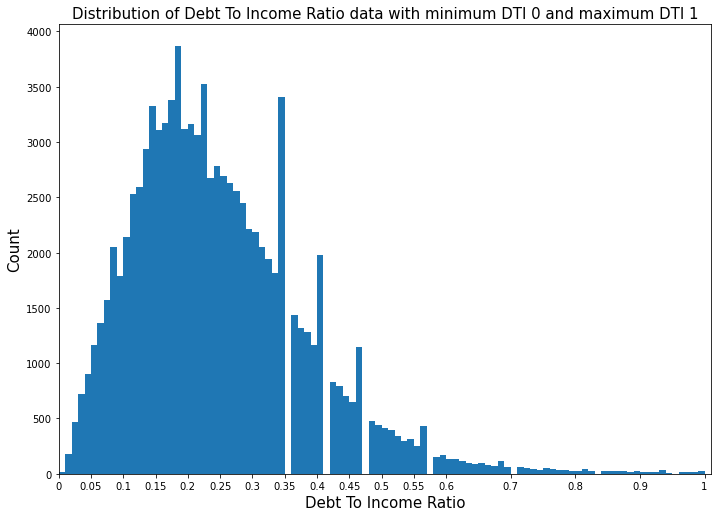

In [18]:
plt.figure(figsize=(11.69, 8.27))
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='DebtToIncomeRatio',data=loan_df,bins=bins)
plt.xlabel('Debt To Income Ratio',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of Debt To Income Ratio data with minimum DTI 0 and maximum DTI 1',fontdict={'size':15})
plt.xticks(tick,labels)
plt.xlim(0,1.01);

## Distribution of 'Loan original Amount'.
> The distribution of 'Loan original amount' is right skewed and unimodal. Also, maximum count of loan original amount is $4,000$ and density of data points is highest between $1000$ and $5000$. Also, minimum and maximum loan original amount are $1000$ and $35000$ respectively.

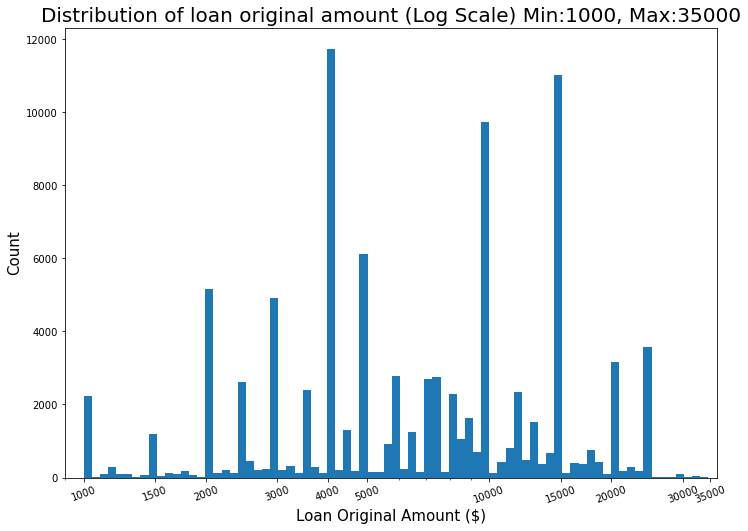

In [19]:
plt.figure(figsize=[11.69, 8.27])
bins = 10**(np.arange(log_trans(loan_df['LoanOriginalAmount'].min()),log_trans(loan_df['LoanOriginalAmount'].max())+0.01,0.02))
tick = [1000,1500,2000,3000,4000,5000,10000,15000,20000,30000,35000]
labels=['{}'.format(x)for x in tick]
plt.hist(x='LoanOriginalAmount',data=loan_df,bins=bins)
plt.xscale('log')
plt.xticks(tick,labels,rotation=20)
plt.xlabel('Loan Original Amount ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of loan original amount (Log Scale) Min:1000, Max:35000',fontdict={'size':20})
plt.xlim(10**(log_trans(900)),10**(log_trans(36500)));

In [20]:
loan_df['LoanOriginalAmount'].describe()

count    96307.000000
mean      8650.133967
std       6370.190320
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

## Distribution of 'Credit Score Class'.
> Credit score class are assigned on the basis of credit score range lower and credit score range upper. Class 'Good' has the highest count whereas class 'Poor' has the lowest count.
>> - Exceptional: 800 to 850. FICO® Scores ranging from 800 to 850 are considered exceptional.
>> - Very good: 740 to 799. FICO® Scores in the 740 to 799 range are deemed very good.
>> - Good: 670 to 739. FICO® Scores in the range of 670 to 739 are rated good.
>> - Fair: 580 to 669.
>> - Poor: 300 to 579.

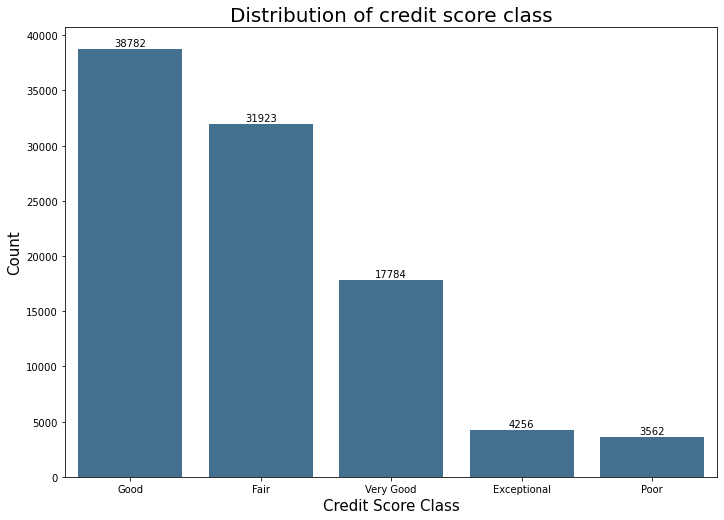

In [21]:
plt.figure(figsize=[11.69, 8.27])
sns.countplot(x='credit_score_class',data=loan_df,order=loan_df['credit_score_class'].value_counts().index,color=base_color,saturation=0.5)
plt.title('Distribution of credit score class',fontdict={'size':20})
for i in range (loan_df['credit_score_class'].value_counts().shape[0]):
    count = loan_df['credit_score_class'].value_counts().values[i]
    plt.text(i, count+1000, count, ha = 'center', va='top')
plt.xlabel('Credit Score Class',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15});

## Distribution of 'Loan Status'.
> Loan Status 'Complete' has the maximum counts (50316).

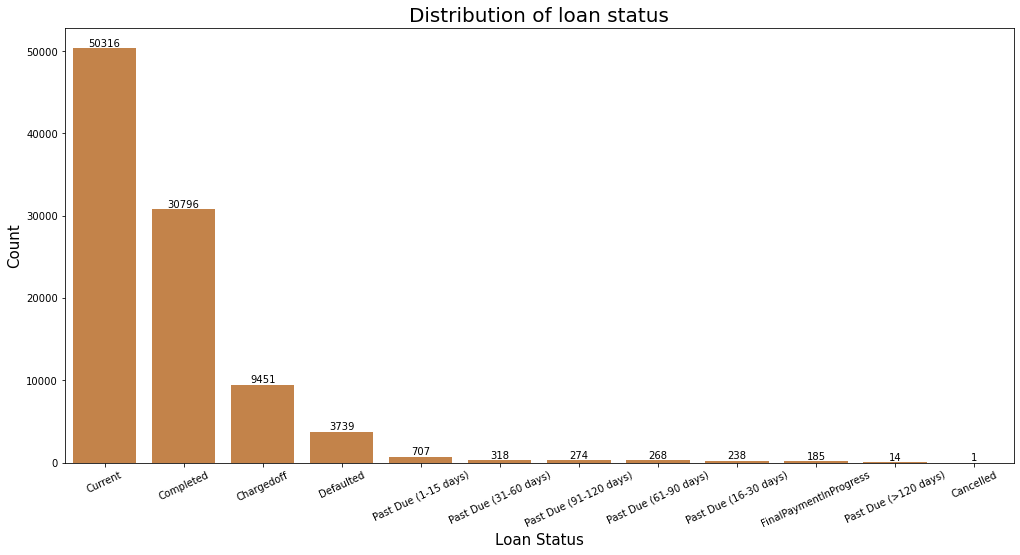

In [22]:
plt.figure(figsize=[17,8])
base_c=sns.color_palette()[1]
sns.countplot(x='LoanStatus',data=loan_df,color=base_c,order=loan_df['LoanStatus'].value_counts().index,saturation=0.5)
plt.title('Distribution of loan status',fontdict={'size':20})
for i in range (loan_df['LoanStatus'].value_counts().shape[0]):
    count = loan_df['LoanStatus'].value_counts().values[i]
    plt.text(i, count+1200, count, ha = 'center', va='top')
plt.xlabel('Loan Status',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.xticks(rotation=25);

## Distribution of 'Listing Labels'.

> Plotting of listing labels shows that 'Debt consolidation' has the highest count. This could mean that many borrowers already have existing debts that is why they have taken debt consolidation loan in order to reduce the burden of existing debts and pay some amount for new loan every month at low interest.

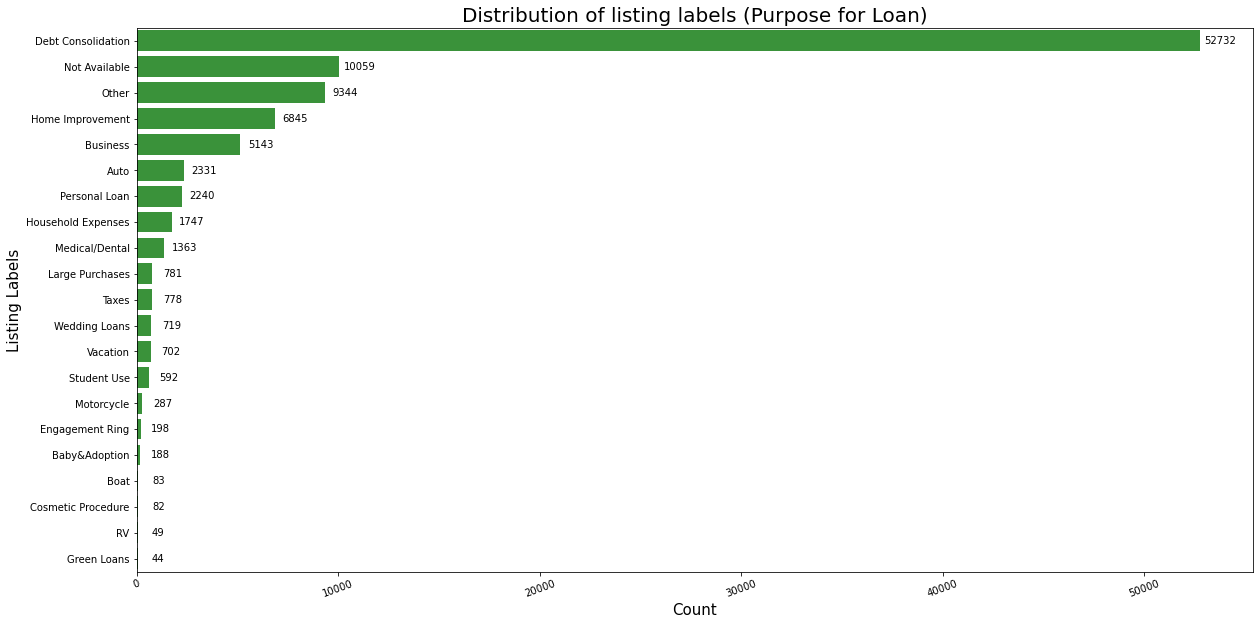

In [23]:
plt.figure(figsize=(20,10))
base_c=sns.color_palette()[2]
sns.countplot(y='ListingLabels',data=loan_df,order=loan_df['ListingLabels'].value_counts().index,color=base_c)
for i in range (loan_df['ListingLabels'].value_counts().shape[0]):
    count = loan_df['ListingLabels'].value_counts().values[i]
    plt.text(count+1000, i, count, ha = 'center', va='center')
plt.xticks(rotation=20)
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Listing Labels',fontdict={'size':15})
plt.title('Distribution of listing labels (Purpose for Loan)',fontdict={'size':20});

## Distribution of ' Stated Monthly Income'.

> Plotting of the 'Stated Monthly Income' using histogram shows that maximum number of borrowers have monthly income income between 2k and 10k with distribution being unimodal. The highest monthly income seems to be 4000 approx. Also, I did log transformation to make interpretations from the data more elucidated.

In [24]:
loan_df = loan_df[loan_df['StatedMonthlyIncome']<40000]
filterdf = loan_df[loan_df['StatedMonthlyIncome']>=40000]

Text(0.5, 1.0, 'Distribution of stated monthly income (Log scale) Min:0, Max:40k')

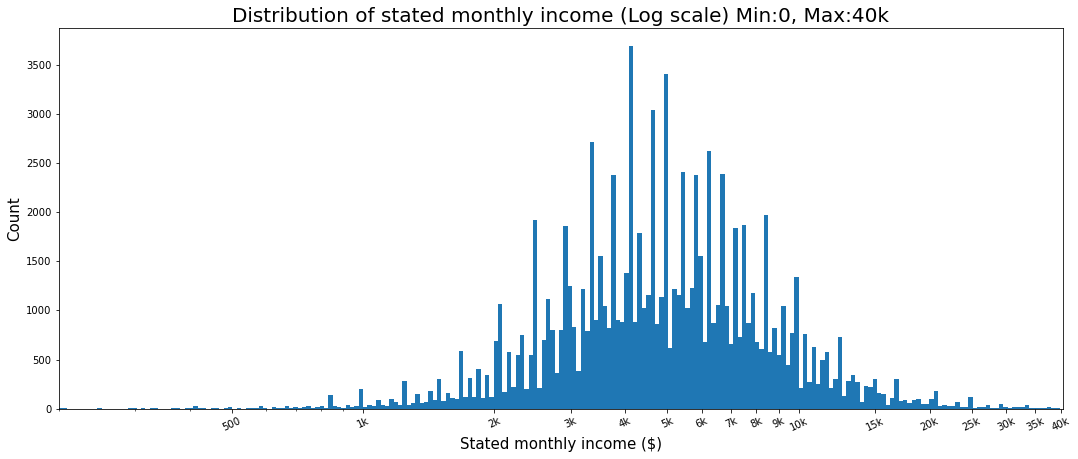

In [25]:
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [0,5e2,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='StatedMonthlyIncome',data=loan_df,bins=bins)
plt.xscale('log')
plt.xticks(10**(log_trans(np.array([0,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
plt.xlim(10**(log_trans(200)),10**(log_trans(40500)))
plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Distribution of stated monthly income (Log scale) Min:0, Max:40k',fontdict={'size':20})
#sns.displot(data=loan_df,x='StatedMonthlyIncome',log_scale=True,kind='kde',rug=True,rug_kws={'c':'red'},height=6,aspect=2)
#plt.xscale('log')
#plt.xticks(10**(log_trans(np.array([0,100,500,1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]))),['0','100','500','1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','30k','35k','40k'],rotation=25);
#plt.xlim(10**(log_trans(200)),10**(log_trans(40500)))
#plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
#plt.ylabel('Count',fontdict={'size':15})
#plt.title('Kernel Density Estimation plot of stated monthly income (Log scale)',fontdict={'size':20});

                                    What features affect the Borrower APR?

                                    

## Borrower APR vs Borrower Rate

> Borrower Rate is highly proportional to borrower APR. Borrower rate and borrower APR counts are maximum between 0.10 and 0.20 (dark shade). Clearly, borrower rate affects borrower APR.

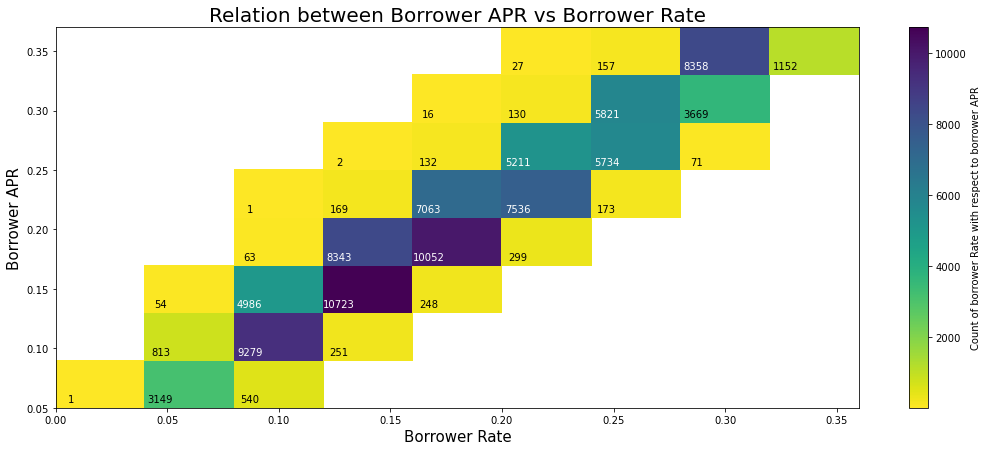

In [26]:
plt.figure(figsize=(18,7))
bins_y=np.arange(0.05,0.40+0.01,0.04)
bins_x=np.arange(0,0.36+0.01,0.04)
ht = plt.hist2d(y='BorrowerAPR',x='BorrowerRate',data=loan_df,cmin=0.5,cmap='viridis_r',bins=[bins_x,bins_y])
count = ht[0]
for i in range(count.shape[0]):
    for j in range(count.shape[1]):
        annot = count[i,j]
        if annot !=np.nan and annot >=4000:
            plt.text(x=bins_x[i]+0.007,y=bins_y[j]+0.007,ha = 'center', va = 'center',s=int(annot),color='white')
        elif annot!=np.nan and annot > 0:
            plt.text(x=bins_x[i]+0.007,y=bins_y[j]+0.007,ha = 'center', va = 'center',s=int(annot),color='black')
plt.colorbar(label='Count of borrower Rate with respect to borrower APR')
plt.title('Relation between Borrower APR vs Borrower Rate',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15});

In [27]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,loan_df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    loan_df[f'{lab} cat'] = pd.cut(x=loan_df[lab],bins=bins,labels=bins[1:],include_lowest=False)

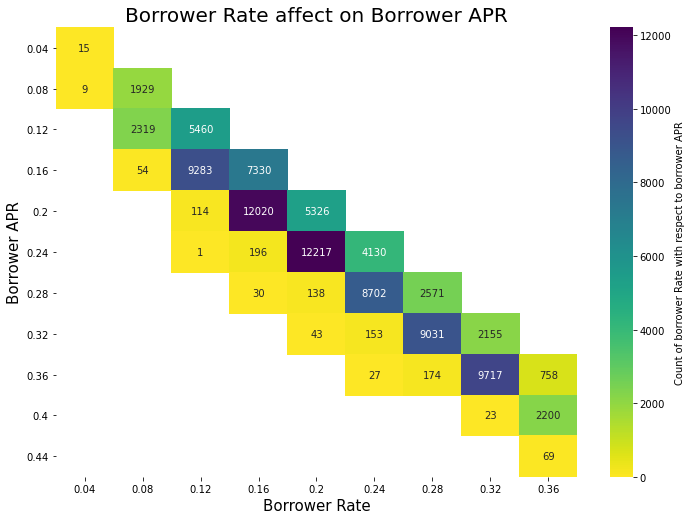

In [28]:
plt.figure(figsize=(11.69, 8.27))
sns.heatmap(loan_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.0f',cmap='viridis_r',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate affect on Borrower APR',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();

## Borrower APR vs Debt To Income Ratio (DTI).

> Their seems to exist a weak positive correlation which indicate that while both variables DTI and APR tend to go up in response to one another, the relationship is not very strong.

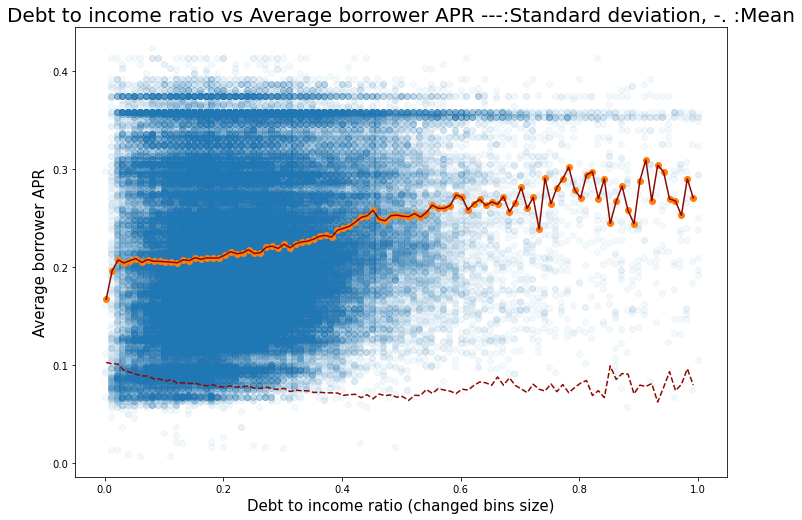

In [29]:
bins_edges = np.arange(0,1+0.1,0.01)
bins_center = bins_edges[:-1]+0.0025
displ_binned = pd.cut(loan_df['DebtToIncomeRatio'], bins_edges, include_lowest = True)
plt.figure(figsize=[11.69, 8.27])
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['BorrowerAPR'].groupby(displ_binned).std()

# Plot the summarized data
#plt.errorbar(x=bins_center, y=comb_mean,yerr=comb_std,)
line_color = sns.color_palette('dark')[3]
plt.scatter(data=loan_df,x = 'DebtToIncomeRatio', y = 'BorrowerAPR',alpha=1/20)
plt.scatter(x = bins_center, y = comb_mean)
plt.errorbar(x = bins_center, y = comb_mean, c = line_color)
plt.errorbar(x = bins_center, y = comb_std, c = line_color, linestyle = '--')
#plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')
plt.title('Debt to income ratio vs Average borrower APR ---:Standard deviation, -. :Mean',fontdict={'size':20})
plt.xlabel('Debt to income ratio (changed bins size)',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15});

## Borrower APR vs Stated Monthly Income.

> Their seems to exist a moderate negative correlation between APR and monthly income which indicate that while both variables tend to go down in response to one another, the relationship is not very strong. 

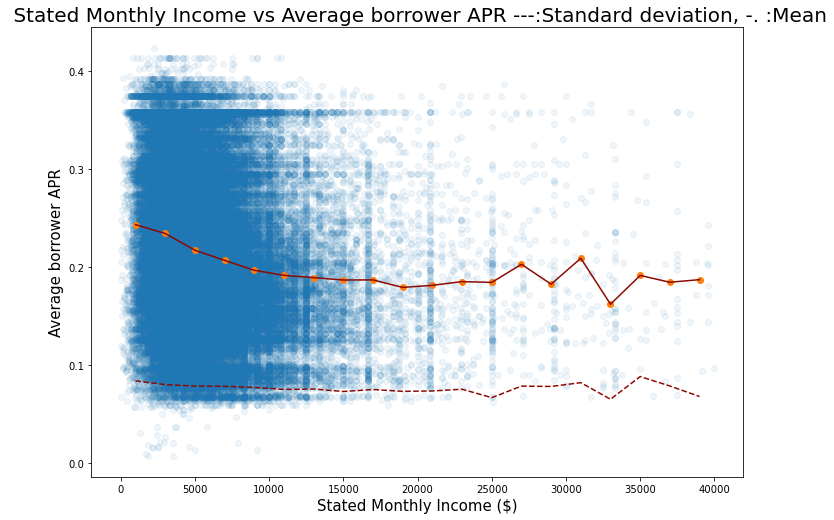

In [30]:
plt.figure(figsize=[ 11.69, 8.27])
bins_edges = np.arange(0,40000+100,2000)
bins_center = bins_edges[:-1]+1000
displ_binned = pd.cut(loan_df['StatedMonthlyIncome'], bins_edges, include_lowest = True)
comb_mean = loan_df['BorrowerAPR'].groupby(displ_binned).mean()
comb_std = loan_df['BorrowerAPR'].groupby(displ_binned).std()

# Plot the summarized data
plt.scatter(data=loan_df,x='StatedMonthlyIncome',y='BorrowerAPR',alpha=1/14)
plt.scatter(x=bins_center,y=comb_mean)
plt.errorbar(x = bins_center, y = comb_mean, c = line_color)
plt.errorbar(x = bins_center, y = comb_std, c = line_color, linestyle = '--')
#plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')
plt.title(' Stated Monthly Income vs Average borrower APR ---:Standard deviation, -. :Mean',fontdict={'size':20})
plt.xlabel('Stated Monthly Income ($)',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15});

## Borrower APR vs Occupation.

> Plotting occupation on the basis of average APR gives the list of occupations with good, moderate and bad APR's within the given range.  
- Average APR Less than 0.2
>Architect<br> 
>Attorney<br>
>Computer Programmer<br>
>Doctor<br>
>Engineer - Chemical<br>
>Engineer - Electrical<br>
>Investor<br>
>Judge<br>
>Pharmacist<br>
>Pilot - Private/Commercial   <br> 
>Professor<br>
>Scientist<br>
>Student - College Graduate Student<br>
>Student - College Junior<br>
>Student - College Senior<br>

- Average APR Between 0.2 and 0.21
> Accountant/CPA<br>
> Analyst<br>
> Dentist<br>
> Engineer - Mechanical<br>
> Executive<br>
> Military Officer<br>
> Principal<br>
> Psychologist<br>
> Realtor<br>
> Tradesman - Carpenter<br>

- Average APR Between 0.21 and 0.22
> Biologist<br>
> Car Dealer<br>
> Chemist<br>
> Construction<br>
> Fireman<br>
> Nurse (RN)<br>
> Professional<br>
> Sales - Commission<br>
> Teacher<br>
> Tradesman - Electrician<br>
> Tradesman - Plumber<br>

- Average APR Between 0.22 and 0.23
>Civil Service<br>
>Clergy<br>
>Flight Attendant<br>
>Food Service Management<br>
>Homemaker<br>
>Landscaping<br>
>Medical Technician<br>
>Other<br>
>Police Officer/Correction Officer<br>
>Postal Service<br>
>Religious<br>
>Retail Management<br>
>Skilled Labor<br>
>Social Worker<br>
>Student - College Sophomore<br>
>Student - Community College<br>
>Student - Technical School<br>
>Tradesman - Mechanic<br>
>Truck Driver<br>

- Average APR between 0.23 and 0.25.
>Administrative Assistant<br>
>Bus Driver<br>
>Clerical<br>
>Food Service<br>
>Laborer<br>
>Military Enlisted<br>
>Nurse (LPN)<br>
>Nurse's Aide<br>
>Sales - Retail<br>
>Waiter/Waitress<br>

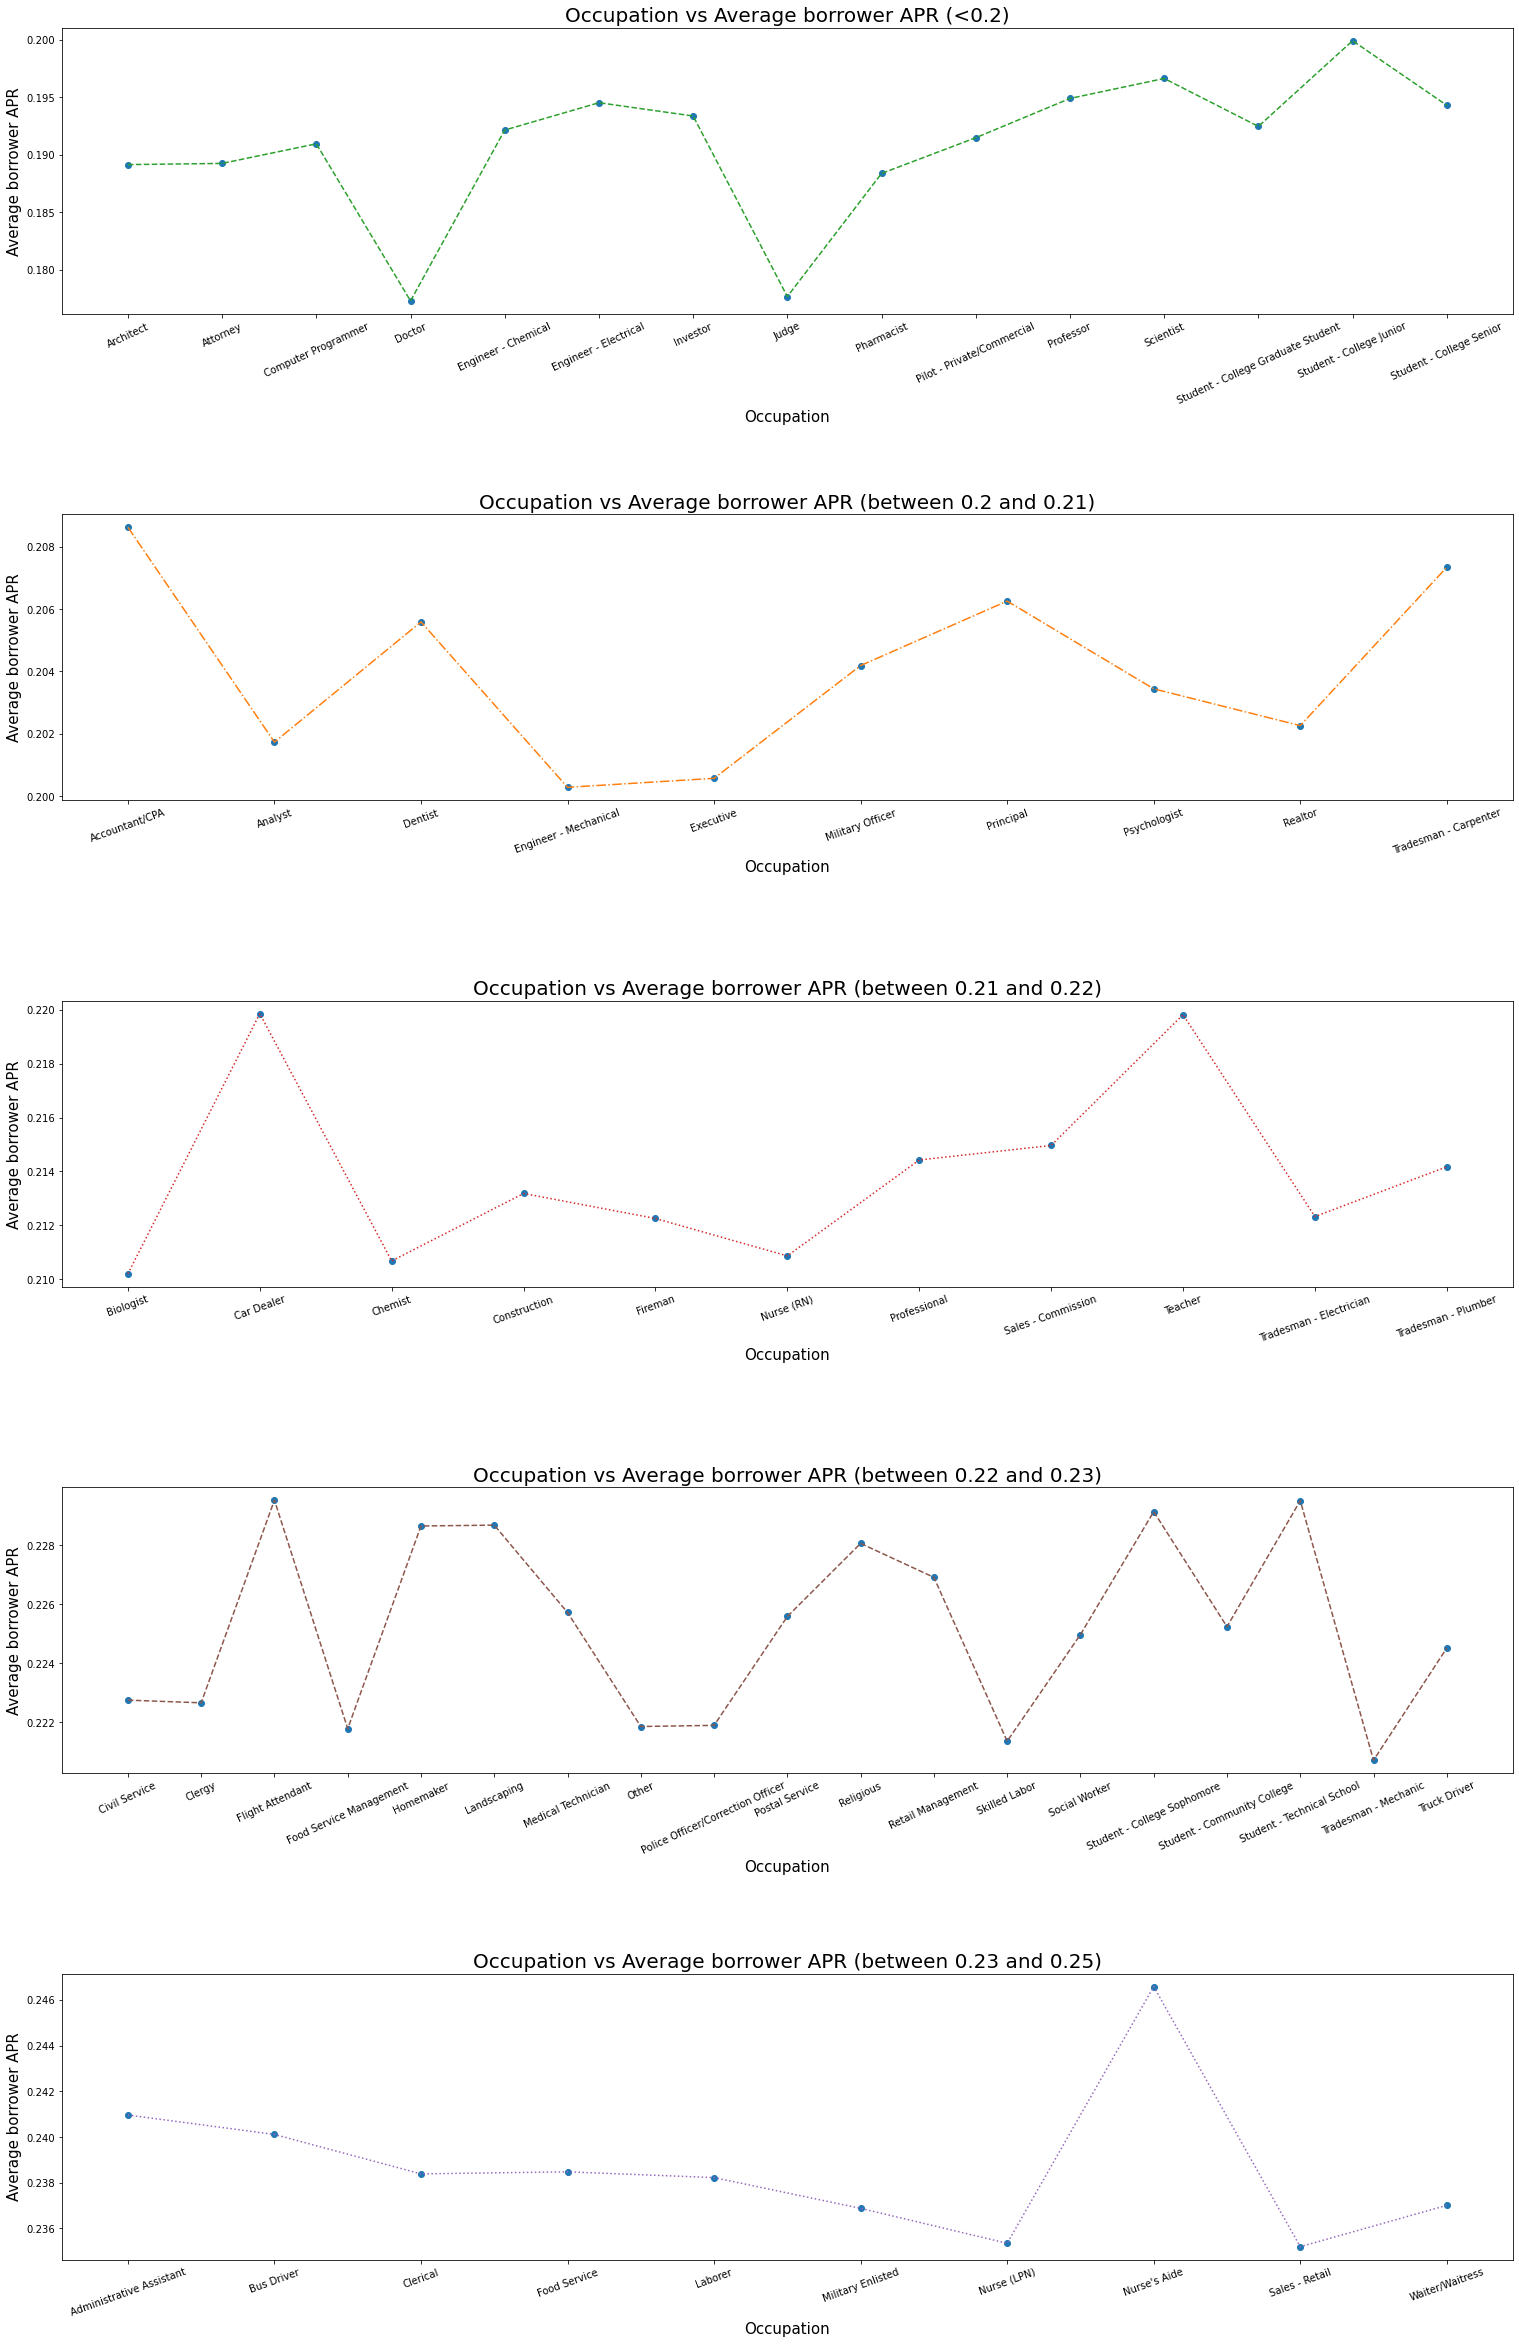

In [31]:
def base_color(c=0):
    l = sns.color_palette()[c]
    return l
occ_apr=loan_df.groupby('Occupation')['BorrowerAPR'].mean().reset_index()

filter1=occ_apr[occ_apr['BorrowerAPR']<0.2]
f2 = occ_apr['BorrowerAPR'].between(0.2,0.21,inclusive=False)
filter2 = occ_apr.loc[f2,:]
f3 = occ_apr['BorrowerAPR'].between(0.21,0.22,inclusive=False)
filter3 = occ_apr.loc[f3,:]
f4 = occ_apr['BorrowerAPR'].between(0.22,0.23,inclusive=False)
filter4 = occ_apr.loc[f4,:]
f5 = occ_apr['BorrowerAPR'].between(0.23,0.25,inclusive=False)
filter5 = occ_apr.loc[f5,:]
plt.figure(figsize=[26,40])
plt.subplot(5,1,1)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter1)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter1,c=base_color(c=2),linestyle='--',)
plt.xticks(rotation=25)
plt.title('Occupation vs Average borrower APR (<0.2)',fontdict={'size':20})
plt.xlabel('Occupation',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15})
plt.subplot(5,1,2)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter2)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter2,c=base_color(c=1),linestyle='-.')
plt.xticks(rotation=20)
plt.title('Occupation vs Average borrower APR (between 0.2 and 0.21)',fontdict={'size':20})
plt.xlabel('Occupation',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15})
plt.subplot(5,1,3)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter3)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter3,c=base_color(c=3),linestyle=':')
plt.xticks(rotation=20)
plt.title('Occupation vs Average borrower APR (between 0.21 and 0.22)',fontdict={'size':20})
plt.xlabel('Occupation',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15})
plt.subplot(5,1,4)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter4)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter4,c=base_color(c=5),linestyle='--')
plt.xticks(rotation=25)
plt.title('Occupation vs Average borrower APR (between 0.22 and 0.23)',fontdict={'size':20})
plt.xlabel('Occupation',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15})
plt.subplot(5,1,5)
plt.scatter(x='Occupation',y='BorrowerAPR',data=filter5)
plt.errorbar(x='Occupation',y='BorrowerAPR',data=filter5,c=base_color(c=4),linestyle='dotted')
plt.xticks(rotation=20)
plt.title('Occupation vs Average borrower APR (between 0.23 and 0.25)',fontdict={'size':20})
plt.xlabel('Occupation',fontdict={'size':15})
plt.ylabel('Average borrower APR',fontdict={'size':15})
plt.subplots_adjust(top=0.9,wspace=0.6, 
                    hspace=0.7)
plt.show();

## Borrower APR vs Credit Score Class.

> Plotting of borrower APR with credit score class shows that count of APR's highest value is maximum for 'Poor' class and as we move from 'Poor' to 'Exceptional', count of APR's highest value decreases.<br>
> For 'Exceptional' maximum APR values are between 0.09 and 0.12 approx.. Thus, credit score class affects the borrower APR.

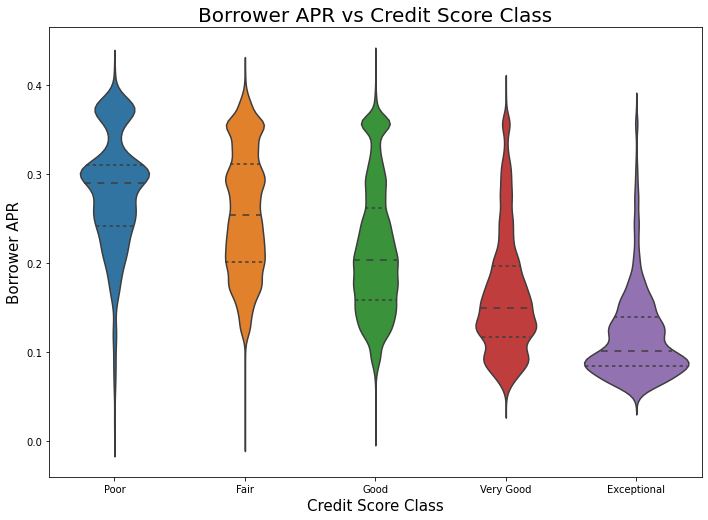

In [32]:
plt.figure(figsize=[ 11.69, 8.27])
base_c=sns.color_palette()[0]
sns.violinplot(x='credit_score_class',y='BorrowerAPR',data=loan_df,inner='quartile')
plt.title('Borrower APR vs Credit Score Class',fontdict={'size':20})
plt.xlabel('Credit Score Class',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15});

                                          What affects the loan status?

## Loan Status by Borrower APR and Credit Score Class.

> For credit score 'Exceptional' and 'Very Good', APR is below 0.20, and, for the rest, APR is above 0.20 in most cases. Also, if a borrower has credit score 'Exceptional' and loan status 'Completed', than he/she most likely to have a APR of 0.10 approx.. Moreover, we can see that in most of the cases if a borrower has credit score class 'Exceptional' or 'Very Good' or 'Good' or 'Fair' with APR in range 0.14-0.15 or 0.20-0.22 or 0.24-0.25 or 0.27-0.29 respectively, the loan status is going to be 'Past Due'. The large error bars indicate that data is very less.

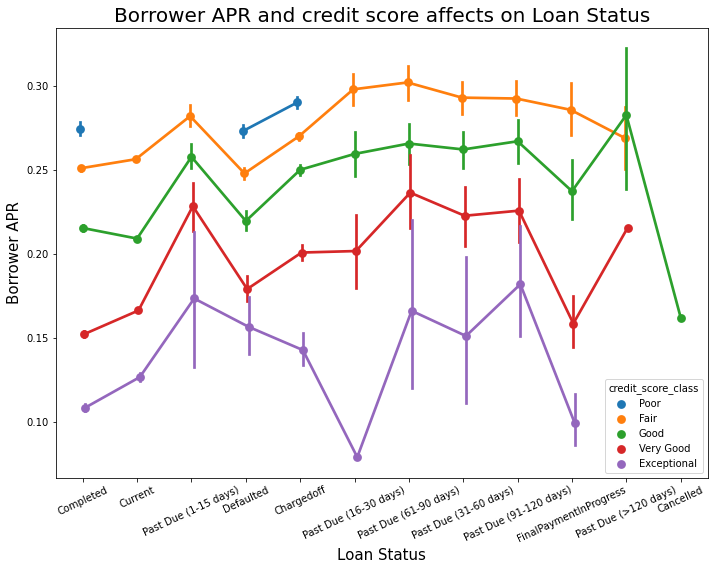

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
bins_x = np.arange(0,loan_df['BorrowerAPR'].max()+0.01,0.02)
sns.pointplot(x='LoanStatus',y='BorrowerAPR',hue='credit_score_class',data=loan_df,dodge=0.1);
plt.xticks(rotation=25)
plt.title('Borrower APR and credit score affects on Loan Status',fontdict={'size':20})
plt.xlabel('Loan Status',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15});

                                    What affects the original loan amount?

## Loan original amount by EmploymentStatus and Credit score

> Reproducing the same plots with employment status on x-axis instead of loan status and loan original amount on y-axis instead of borrower APR shows that if a borrower has 'Exceptional' credit score with 'Employed' as employment status than loan original amount tends to be the highest. Whereas for same credit score but 'Not Employed' employment status,  loan original amount tends to be the lowest. Interestingly, for each credit score class (except 'Good') and 'Employed' status, loan original amount is always the highest. Moreover, for each credit score class (except 'Poor') and 'Not Employed' status, loan original amount is always the lowest.

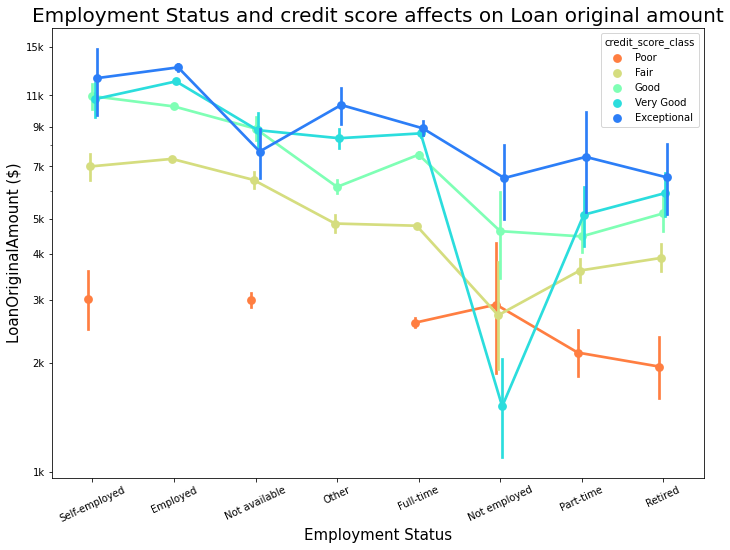

In [34]:
plt.figure(figsize=[ 11.69, 8.27])
ticks = [1e3,2e3,3e3,4e3,5e3,7e3,9e3,11e3,15e3]
sns.pointplot(x='EmploymentStatus',y='LoanOriginalAmount',hue='credit_score_class',data=loan_df,dodge=0.1,palette='rainbow_r');
plt.xticks(rotation=25)
plt.yscale('log')
plt.yticks(10**(log_trans(np.array(ticks))),['1k','2k','3k','4k','5k','7k','9k','11k','15k'])
plt.title('Employment Status and credit score affects on Loan original amount',fontdict={'size':20})
plt.xlabel('Employment Status',fontdict={'size':15})
plt.ylabel('LoanOriginalAmount ($)',fontdict={'size':15});


## Loan original amount by stated monthly income and credit score class.

> Many Borrowers with credit score of 'Exceptional','Very Good' and 'Good' tend to have high loan original amount compare to other credit class.

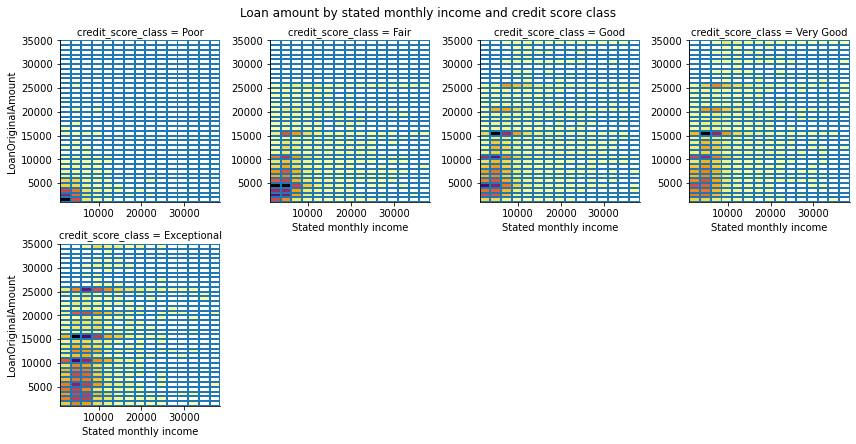

In [35]:
binsx = np.arange(1000,40000+40,2500)
binsy = np.arange(1000,35000+40,1000)
g = sns.FacetGrid(data = loan_df, col = 'credit_score_class', sharex=False,sharey=False,col_wrap = 4,size=3)
g.map(plt.hist2d,'StatedMonthlyIncome', 'LoanOriginalAmount',bins=[binsx,binsy],cmap='inferno_r',cmin=0.5)
g.set_xlabels('Stated monthly income')
g.set_ylabels('LoanOriginalAmount')
g.fig.suptitle('Loan amount by stated monthly income and credit score class',y=1.02)
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

# Thank You.

In [8]:
!jupyter nbconvert presentation.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 1821465 bytes to presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/presentation.slides.html
Use Control-C to stop this server
^C

Interrupted
